In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base=automap_base()


# reflect the tables
Base.prepare(engine,reflect=True)


In [9]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [10]:
# Save references to each table
Measurements=Base.classes.measurement
Station=Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)


# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date=dt.datetime(2016, 7,31) #
#measurement_data=session.query(Measurements.date,Measurements.prcp).filter(func.strftime('%Y-%m-%d', Measurements.date) > '2016-07-31').all()
measurement_data=session.query(Measurements.date,Measurements.prcp).filter(Measurements.date >date).all()
session.close()

In [13]:
# Unpack the `date` and `prcp` from measurements_data and save into separate lists
date_info=[row[0] for row in measurement_data]
prcp_info=[row[1] for row in measurement_data]
type(date_info)

list

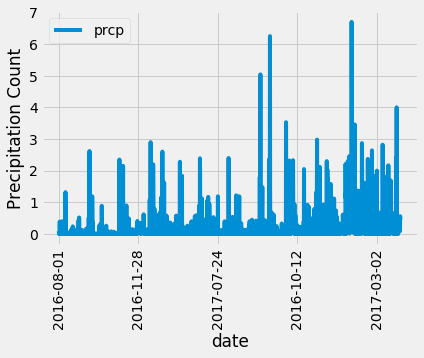

In [14]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(list(zip(date_info,prcp_info)),columns=['date','prcp'])
df.dropna(inplace=True)
df.set_index('date',inplace=True)
# Sort the dataframe by date
df.sort_values('date')
df.plot(rot=90)
plt.ylabel('Precipitation Count')
plt.title('')
plt.savefig("Images/prcp.jpeg")
plt.show()



In [15]:


# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2148.000000
mean,0.182896
std,0.467339
min,0.000000
25%,0.000000
50%,0.020000
75%,0.140000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
session1=Session(engine)
Total_stations_count=session1.query(Measurements.station,Measurements.date,Measurements.tobs).\
        group_by (Measurements.station).\
        order_by (Measurements.date).\
        count()
session1.close()
Total_stations_count



9

In [17]:
#Design a query ( What are the most active stations? (i.e. what stations have the most rows)?)
# List the stations and the counts in descending order
session2=Session(engine)
stats=[Measurements.station,
      func.min(Measurements.tobs),
      func.max(Measurements.tobs),
      func.avg(Measurements.tobs),
      func.count(Measurements.tobs)]
active_station=session2.query(*stats).\
        group_by(Measurements.station).\
        order_by(func.count(Measurements.tobs).desc()).all()
session2.close()
active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067, 2772),
 ('USC00519397', 56.0, 87.0, 74.55323054331865, 2724),
 ('USC00513117', 59.0, 85.0, 72.68918420081211, 2709),
 ('USC00519523', 56.0, 85.0, 74.5436493068565, 2669),
 ('USC00516128', 58.0, 84.0, 70.91500765696784, 2612),
 ('USC00514830', 58.0, 85.0, 74.8732970027248, 2202),
 ('USC00511918', 53.0, 87.0, 71.61596766043456, 1979),
 ('USC00517948', 58.0, 87.0, 74.68440233236151, 1372),
 ('USC00518838', 58.0, 83.0, 72.72407045009784, 511)]

In [18]:

#unpack the 'station'
stations=[row[0] for row in active_station]
#get the first station-the most active station
most_active_station=stations[0]
most_active_station

'USC00519281'

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import datetime as dt
session3=Session(engine)
date1=dt.datetime(2016, 7,31)
temp_data=session3.query(Measurements.station,Measurements.date,Measurements.tobs).\
            filter(Measurements.station=='USC00519281').\
            filter(Measurements.date > date1).all()
session3.close()
date=[row[1] for row in temp_data]
temp=[row[2] for row in temp_data]
temp_df=pd.DataFrame(list(zip(date,temp)),columns=['Date','Temp'])
temp_df.set_index('Date',inplace=True)
temp_df.sort_values('Date')

,Temp
Date,
2016-08-01,76.0
2016-08-02,76.0
2016-08-03,77.0
2016-08-04,77.0
2016-08-05,81.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


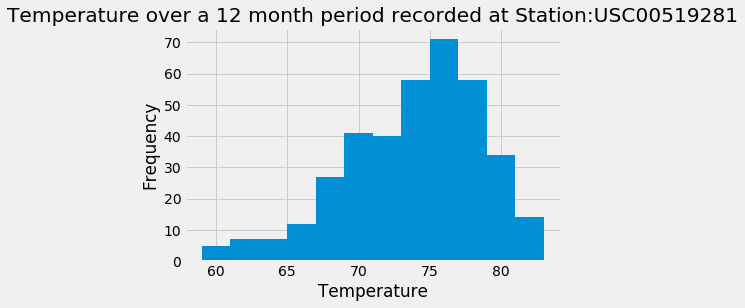

In [21]:
#temp_df.plot(rot=90,figsize=(15,8),ylim=(50,100))#,xlim=(dt.datetime(2016, 8, 1),dt.datetime(2017, 8,31)),figsize=(15,8))
temp_df.hist(bins=12)
plt.title('Temperature over a 12 month period recorded at Station:USC00519281')

plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.savefig("Images/Histogram.jpeg")
plt.show()


In [22]:
###Histogram Analysis
####It shows the frequency of occurence of temperatures over a 12 month period.


## Bonus Challenge Assignment

### Temperature Analysis I

In [ ]:
#### A paired t-test is done since we are compairing the means of the SAME CHARACTERISTIC(TEMPERATURE) in two different months

In [23]:
#Average temperature in June and dec
import scipy.stats as stats
session6=Session(engine)
res=session6.query(Measurements.tobs).filter(func.strftime("%m",Measurements.date) == "06").limit(500).all()
res1=session6.query(Measurements.tobs).filter(func.strftime("%m",Measurements.date) == "12").limit(500).all()


June_temp=[row[0] for row in res]
Dec_temp=[row[0] for row in res1]
June_mean=sum(June_temp)/len(June_temp)
Dec_mean=sum(Dec_temp)/len(Dec_temp)
print(f"{June_mean},{Dec_mean}")

75.686,71.066


In [24]:
ttest,pval = stats.ttest_rel(June_temp,Dec_temp)
# len(June_temp)
ttest,pval

(24.151639558336903, 6.199221092872145e-86)

##### Null hypothesis:Hawaii is reputed to enjoy mild weather all year
##### Alternate Hypothesis :Hawaii is not reputed to enjoy mild weather all year

#### Since the pval<0.05 it points to the fact that the null hypothesis is not True .
#### There is a difference in the mean of the two temperatures in the two months.


### Temperature Analysis II

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
session4=Session(engine)
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session4.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax   
# for your trip using the previous year's data for those same dates.
my_trip=calc_temps('2011-02-28', '2011-03-05')
my_trip

[(61.0, 69.75510204081633, 75.0)]

In [28]:


#create a dataframe
my_trip_df=pd.DataFrame(my_trip,columns=["tmin","tavg","tmax"])
my_trip_df

,tmin,tavg,tmax
0,61.0,69.755102,75.0


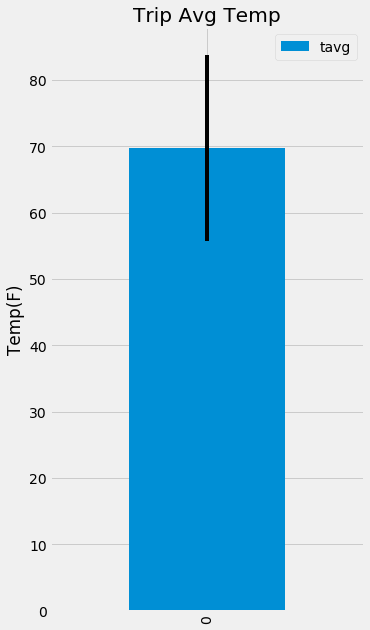

In [29]:
# bar plot the df
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr=84
#create a dataframe
my_trip_df.plot.bar(y="tavg",yerr=28/2,figsize=(5,10))
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")
plt.savefig("Images/Trip_Avg_Temp.jpeg")
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
session5=Session(engine)
columns=[Measurements.station,func.sum(Measurements.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation]
total_rainfall_per_station=session5.query(*columns)\
                            .filter(Measurements.station ==Station.station)\
                            .filter(Measurements.date >= '2011-02-28')\
                            .filter(Measurements.date <= '2011-03-05')\
                            .group_by(Measurements.station)\
                            .order_by(func.sum(Measurements.prcp).desc()).all()
 #.filter(Station.station == Measurements.station)                           

#(Measurements, Station).join(Station).filter(Station.station == Measurements.station)
                    

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_per_station


[('USC00518838',
  2.33,
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6),
 ('USC00519281',
  2.23,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519523',
  2.19,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  1.96,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  1.45,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00513117', 1.44, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00519397', 1.38, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00511918',
  0.63,
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00517948', None, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurements.date,func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurements.date) == date).all()
    
daily_normals("01-01")


[('2011-01-01', 62.0, 69.15384615384616, 77.0)]

In [32]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
from datetime import timedelta, date
# Set the start and end date of the trip
start_dt = date(2011, 2, 28)
end_dt = date(2011, 3, 5)
# Use the start and end date to create a range of dates


def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)


trip_dates=[]
year_trip_dates=[]
for dt in daterange(start_dt, end_dt):
    trip_dates.append(dt.strftime("%m-%d"))
    year_trip_dates.append(dt.strftime("%Y-%m-%d"))# Stip off the year and save a list of %m-%d strings
trip_dates
year_trip_dates

['2011-02-28',
 '2011-03-01',
 '2011-03-02',
 '2011-03-03',
 '2011-03-04',
 '2011-03-05']

In [33]:
# Loop through the list of %m-%d strings and calculate the normals for each date

a=[]
trip_d=[]
Tmin=[]
Tavg=[]
Tmax=[]
for date in trip_dates:
    a=daily_normals(date)
    Tmin.append(a[0][1])
    Tavg.append(a[0][2])
    Tmax.append(a[0][3])
info=list(zip(year_trip_dates,Tmin,Tavg,Tmax))



In [34]:
# Load the previous query results into a Pandas DataFrame
daily_normal=pd.DataFrame(info,columns=["Trip Dates","Tmin","TAvg","Tmax"])
#add the `trip_dates` range as the `date` index
daily_normal.set_index('Trip Dates',inplace=True)   
daily_normal.sort_index()

,Tmin,TAvg,Tmax
Trip Dates,,,
2011-02-28,65.0,70.655172,80.0
2011-03-01,64.0,70.032787,76.0
2011-03-02,61.0,70.366667,78.0
2011-03-03,60.0,70.068966,78.0
2011-03-04,57.0,69.272727,77.0
2011-03-05,60.0,67.890909,76.0


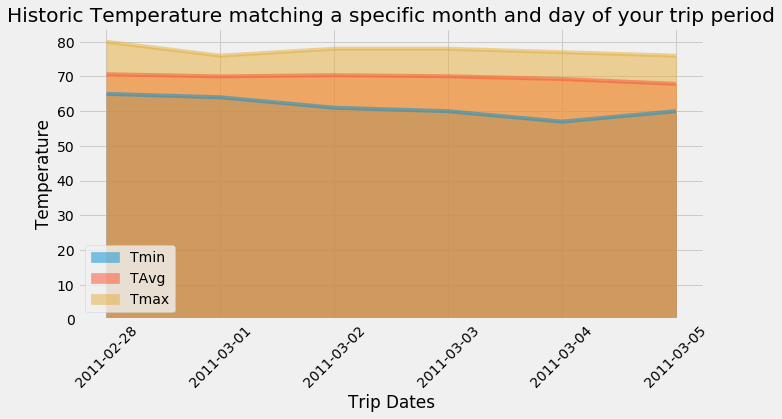

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normal.plot(kind='area',stacked=False,rot=45,figsize=(10,5))
plt.ylabel("Temperature")
plt.title("Historic Temperature matching a specific month and day of your trip period")
plt.savefig("Images/daily_normals.jpeg")
plt.show()

### Analysis
#### Using historical dates the above area plot shows the minimum,maximum and average temperature over the course of the many previous year for your trip dates doesnt vary much.
